In [3]:
import numpy
print(numpy.__version__)

1.17.0


In [2]:
import keras
print(keras.__version__)

Using TensorFlow backend.
C:\ProgramData\Anaconda3\envs\KelasMengemudi\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\envs\KelasMengemudi\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\envs\KelasMengemudi\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaco

2.3.1


C:\ProgramData\Anaconda3\envs\KelasMengemudi\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\envs\KelasMengemudi\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\envs\KelasMengemudi\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\

In [6]:
import numpy as np
np.random.seed(123)  # for reproducibility

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

In [10]:
from keras.datasets import mnist
 
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [12]:
print(X_train.shape)

(60000, 28, 28)


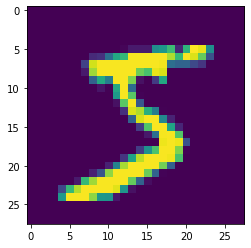

In [13]:
from matplotlib import pyplot as plt
plt.imshow(X_train[0])

In [14]:
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

In [15]:
print(X_train.shape)

(60000, 1, 28, 28)


In [16]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [18]:
print(X_train.shape)

(60000, 1, 28, 28)


In [19]:
print(y_train[:10])

[5 0 4 1 9 2 1 3 1 4]


In [20]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [21]:
print(Y_train.shape)

(60000, 10)


In [22]:
model = Sequential()

In [23]:
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(1,28,28)))

C:\ProgramData\Anaconda3\envs\KelasMengemudi\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(1, 28, 28...)`
  """Entry point for launching an IPython kernel.


ValueError: Negative dimension size caused by subtracting 3 from 1 for 'conv2d_1/convolution' (op: 'Conv2D') with input shapes: [?,1,28,28], [3,3,28,32].

In [24]:
print(model.output_shape)

AttributeError: The layer has never been called and thus has no defined output shape.

In [25]:
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

C:\ProgramData\Anaconda3\envs\KelasMengemudi\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  """Entry point for launching an IPython kernel.


In [26]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [27]:
model = Sequential()
 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(1,28,28)))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

C:\ProgramData\Anaconda3\envs\KelasMengemudi\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(1, 28, 28...)`
  This is separate from the ipykernel package so we can avoid doing imports until


ValueError: Negative dimension size caused by subtracting 3 from 1 for 'conv2d_3/convolution' (op: 'Conv2D') with input shapes: [?,1,28,28], [3,3,28,32].

In [28]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [29]:
model.fit(X_train, Y_train, 
          batch_size=32, nb_epoch=10, verbose=1)

C:\ProgramData\Anaconda3\envs\KelasMengemudi\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


ValueError: Error when checking target: expected sequential_2_input to have 4 dimensions, but got array with shape (60000, 10)

In [30]:
score = model.evaluate(X_test, Y_test, verbose=0)

ValueError: Error when checking target: expected sequential_2_input to have 4 dimensions, but got array with shape (10000, 10)